# SVD from scratch

I have once read that typical mistake of aspiring/wannabe/beginner data scientists is trying to "reinvent the wheel", that is, trying to write their own implementations of algorithms, which already have good, realiable, fast and tested versions in popular libraries. This is exactly the case with alorithm I am wrestling with in this notebook - Singular Value Decomposition. So why am I doing this "mistake"? Nonetheless, writig alogirthm line after line is:

1. Good way of showing that you actually get it right (or that ypu understand all the "magic" that is happening when you use scikit-learn). This is especially important when you're slef-taught (like me).
2. Way to challenge yourself and improve your math (linear algebra in this case) skills 

# So what is 'SVD'?

There are many good explanations in classical linear algebra textbooks and in the web. I am a huge fan of Gilbert Strang's book and his OCW classes, but when it comes to SVD, here is my favourite explanation:

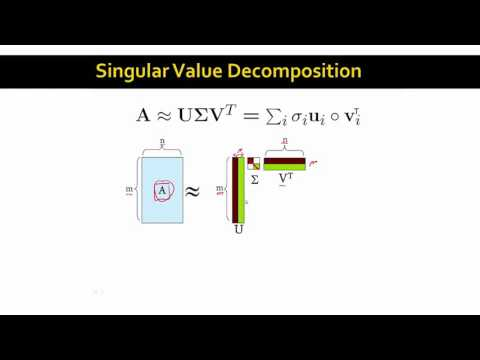

In [209]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('P5mlg91as1c',  width=975, height=450)

# Basic Example

In [210]:
import numpy as np
from sympy import Matrix

In [211]:
A = np.array([[5, 5],[-1, 7]])

In [212]:
A #that's our dummy, simple matrix we'll use to try our solution

array([[ 5,  5],
       [-1,  7]])

If you watched carefully video above, you know that our goal is to decompose our initial matrix A into three new ones: 
1. Orthogonal and long matrix U
2. Diagonal matrix Sigma with non-negative entries / singular values
3. Orthogonal and wide matrix V-transposed

# $$A=U \Sigma V^T$$

To reach our goal, we actually have to solve two equations:
### $$A^TA = V \Sigma^T\Sigma V^T$$ 
### $$AV = U\Sigma$$

In [213]:
#Compute A-transpose A - right hand side of our first eqaution

A.T @ A

array([[26, 18],
       [18, 74]])

In [214]:
#find eigenvaules
np.linalg.eigvals(A.T @ A)

array([20., 80.])

In [215]:
#find eigenvectors
A.T@A - 20*np.identity(2)

array([[ 6., 18.],
       [18., 54.]])

In [216]:
#find a vector in nullspace of matrix above and normalize it

In [217]:
V1 = np.array((Matrix(A.T@A - 20*np.identity(2))).nullspace()/np.sqrt(10))
V1 = np.vstack(V1[:, :]).astype(np.float)
V1

array([[-0.9486833 ,  0.31622777]])

In [218]:
A.T@A - 80*np.identity(2)

array([[-54.,  18.],
       [ 18.,  -6.]])

In [219]:
#looks kinda normalized?
V2 = (Matrix(A.T@A - 80*np.identity(2))).nullspace()/np.sqrt(0.33333**2 + 1**2)
V2 = np.vstack(V2[:, :]).astype(np.float)
V2

array([[0.31622808, 0.94868425]])

In [220]:
V = np.column_stack((V1.T, V2.T))
V

array([[-0.9486833 ,  0.31622808],
       [ 0.31622777,  0.94868425]])

In [221]:
#sigma

In [222]:
Sigma = np.sqrt(np.diag(np.linalg.eigvals(A.T @ A)))
Sigma

array([[4.47213595, 0.        ],
       [0.        , 8.94427191]])

In [223]:
#A multiplied by V = U Sigma
U = A @ V / np.array([2*np.sqrt(5), 4*np.sqrt(5)])

In [228]:
U

array([[-0.70710678,  0.70710749],
       [ 0.70710678,  0.70710749]])

In [ ]:
# Got it, but we can make a sanity check

In [226]:
np.linalg.svd(A) #looks kinda ok, differences of rows/signs come from order of eigenvectors!

(array([[ 0.70710678,  0.70710678],
        [ 0.70710678, -0.70710678]]),
 array([8.94427191, 4.47213595]),
 array([[ 0.31622777,  0.9486833 ],
        [ 0.9486833 , -0.31622777]]))

### To do:
1. Reduce the 'explanatory' part
2. Pack it into a function
3. Experiment!
4. Try to code more advanced alorithms based on SVD.